In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction
import os

In [3]:
diamond_data = pd.read_csv("Dataset/diamonds.csv")

In [4]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Data Cleaning
#Drop Unnecessary column Unnamed
diamond_data = diamond_data.drop(["Unnamed: 0"],axis=1)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


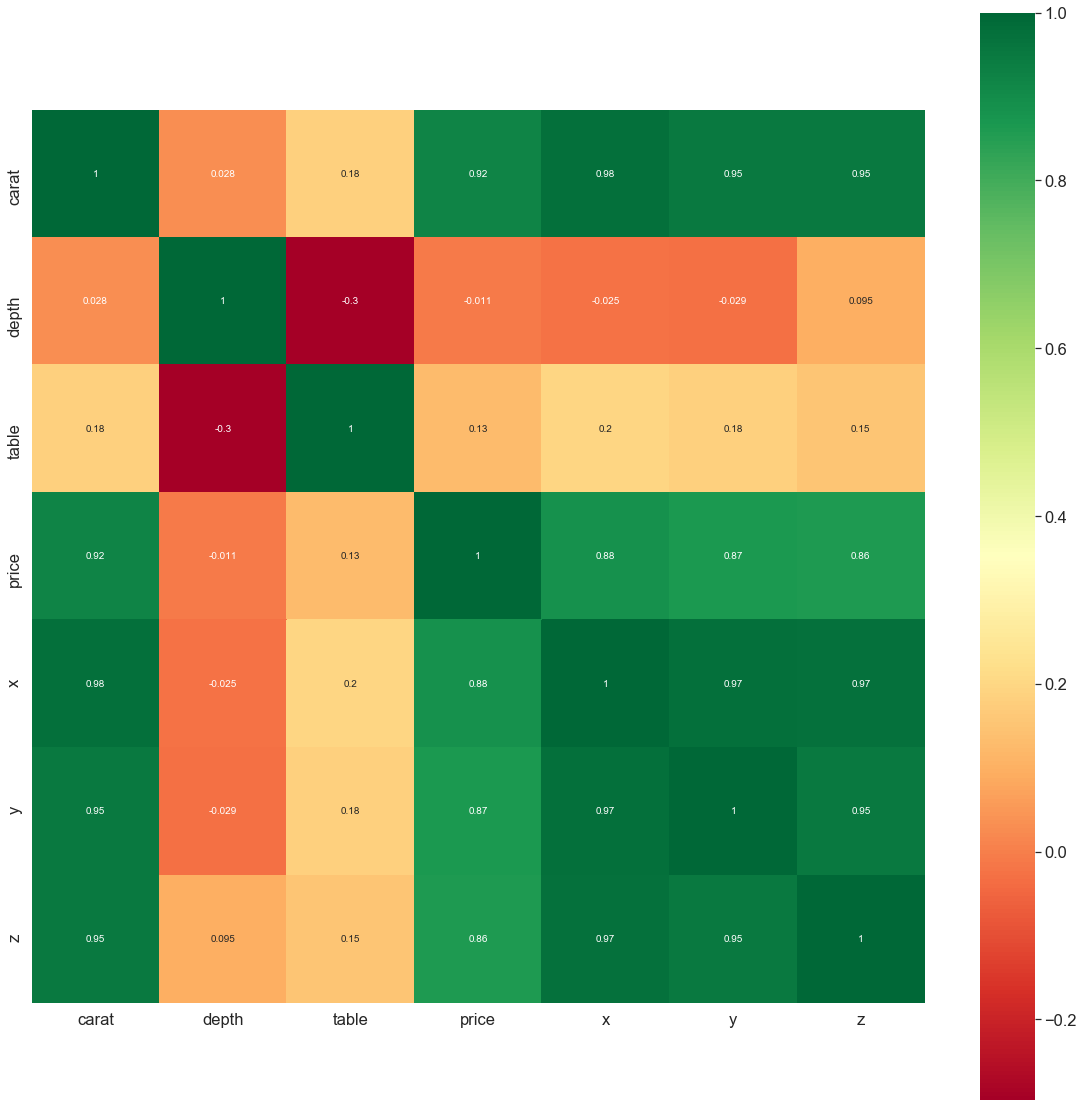

In [7]:
# on this line I just set the size of figure to 12 by 10.
plt.figure(figsize=(20,20))  

# seaborn has very simple solution for heatmap
p=sns.heatmap(diamond_data.corr(), annot=True,cmap='RdYlGn',square=True)  

Few observations from the above plot
1. x,y, and z have a very strong relation with price but surprisingly depth (which comes from x,y, and z) doesn't has a significant relation with price.
2. Carat has a strong relation with price
3. Table doesn't have a significant relation with price or any other variable as well ( We can try dropping that when making the model)

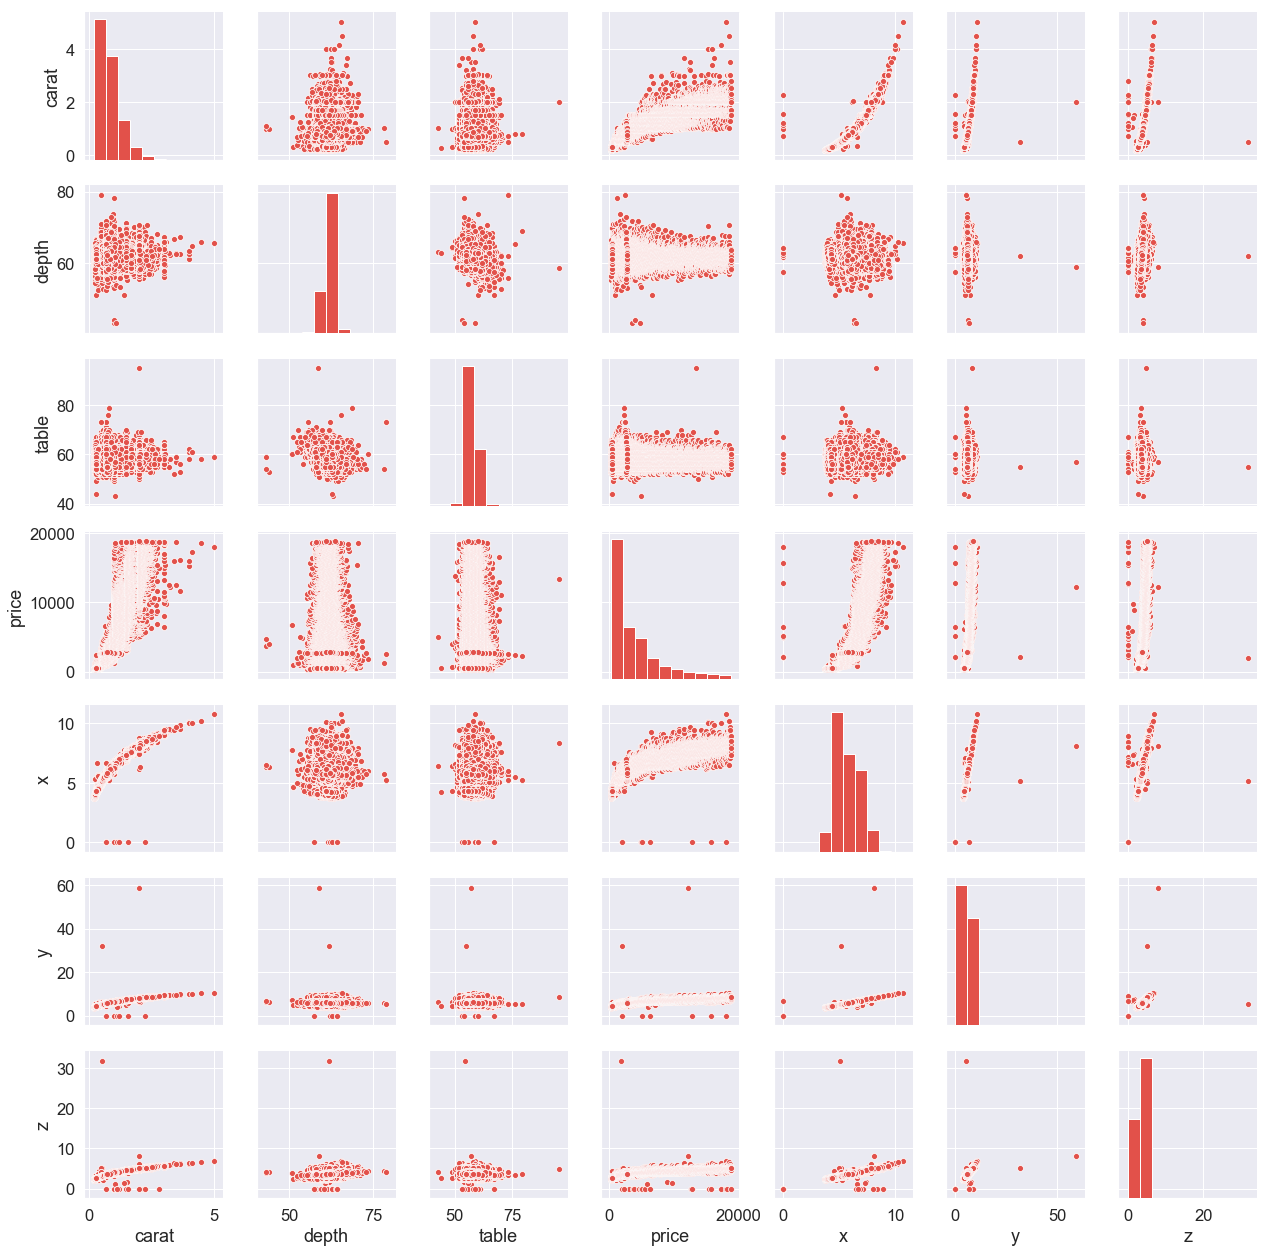

In [7]:
p=sns.pairplot(diamond_data)

In [8]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [9]:
print("Number of rows with x == 0: {} ".format((diamond_data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamond_data.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


# A zero value in these rows means missing data so we can replace the zeros with nan. Another thing to notice is that the depth column doesn't have a single zero value. We know that depth is calculated using the three parameters only

In [10]:
diamond_data[['x','y','z']] = diamond_data[['x','y','z']].replace(0,np.NaN)

In [11]:
diamond_data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [12]:
diamond_data.dropna(inplace=True)

In [13]:
diamond_data.shape

(53920, 10)

In [14]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

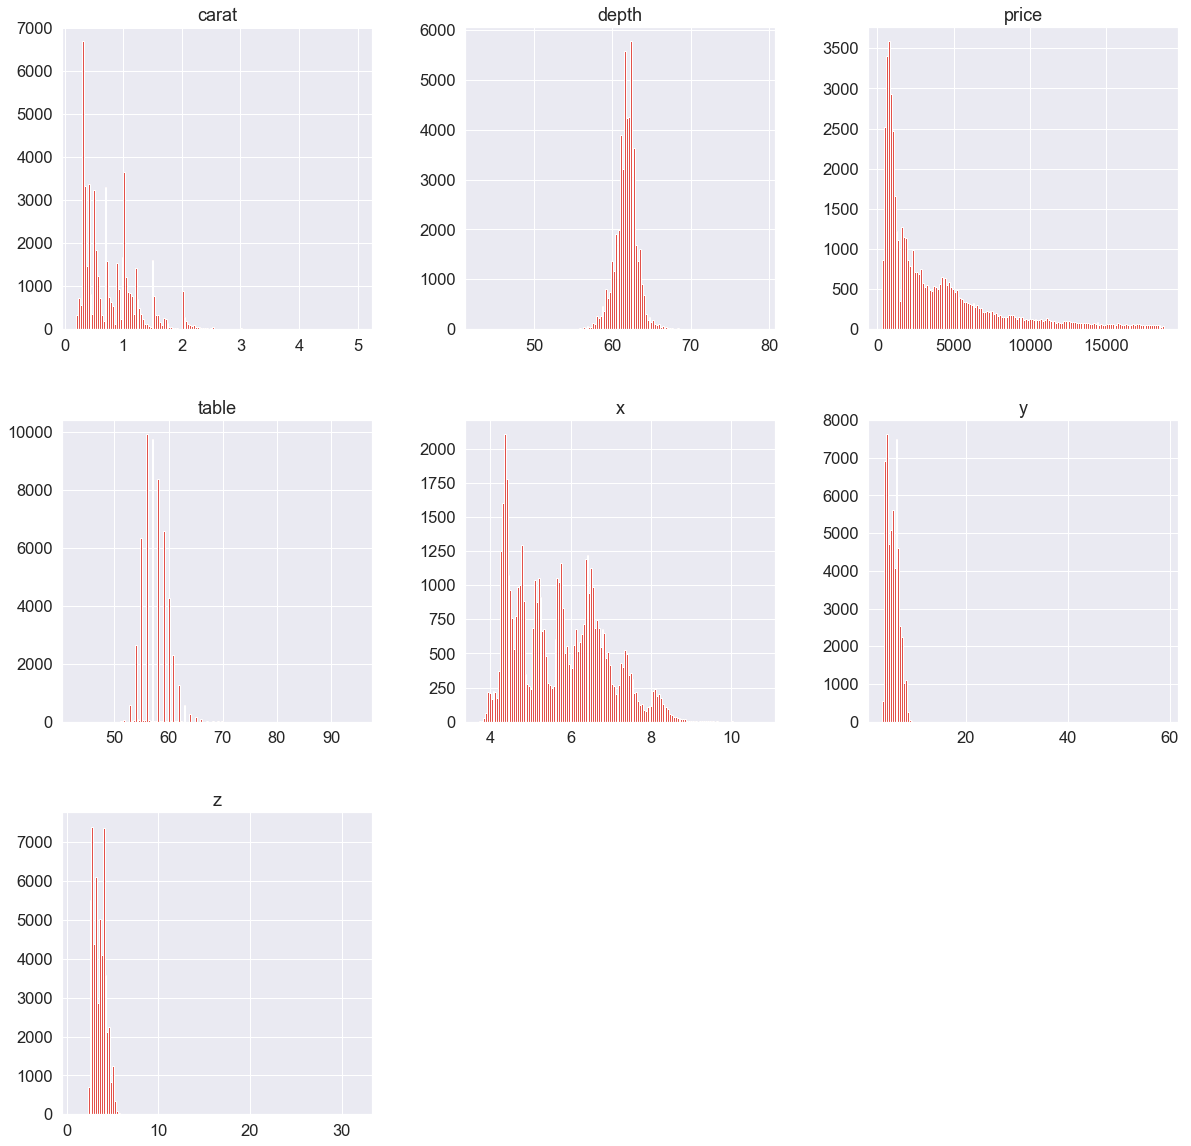

In [15]:
p = diamond_data.hist(figsize = (20,20),bins=150)

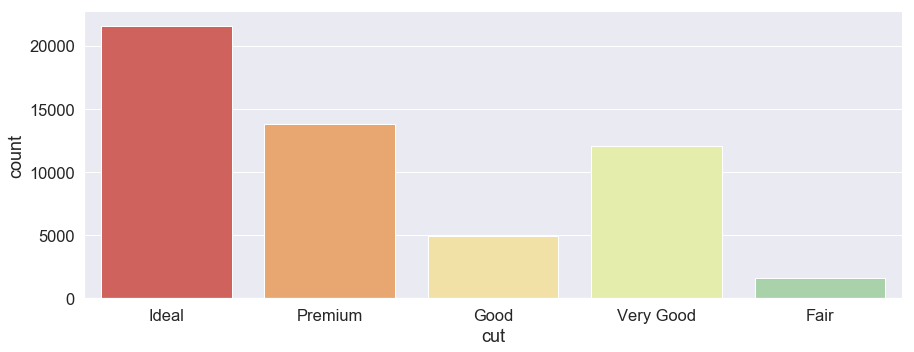

In [16]:
p = sns.factorplot(x='cut', data=diamond_data , kind='count',aspect=2.5 )

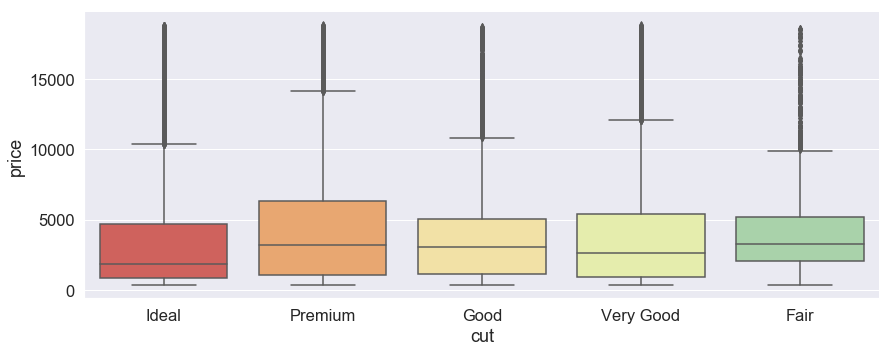

In [17]:
p = sns.factorplot(x='cut', y='price', data=diamond_data, kind='box' ,aspect=2.5 )

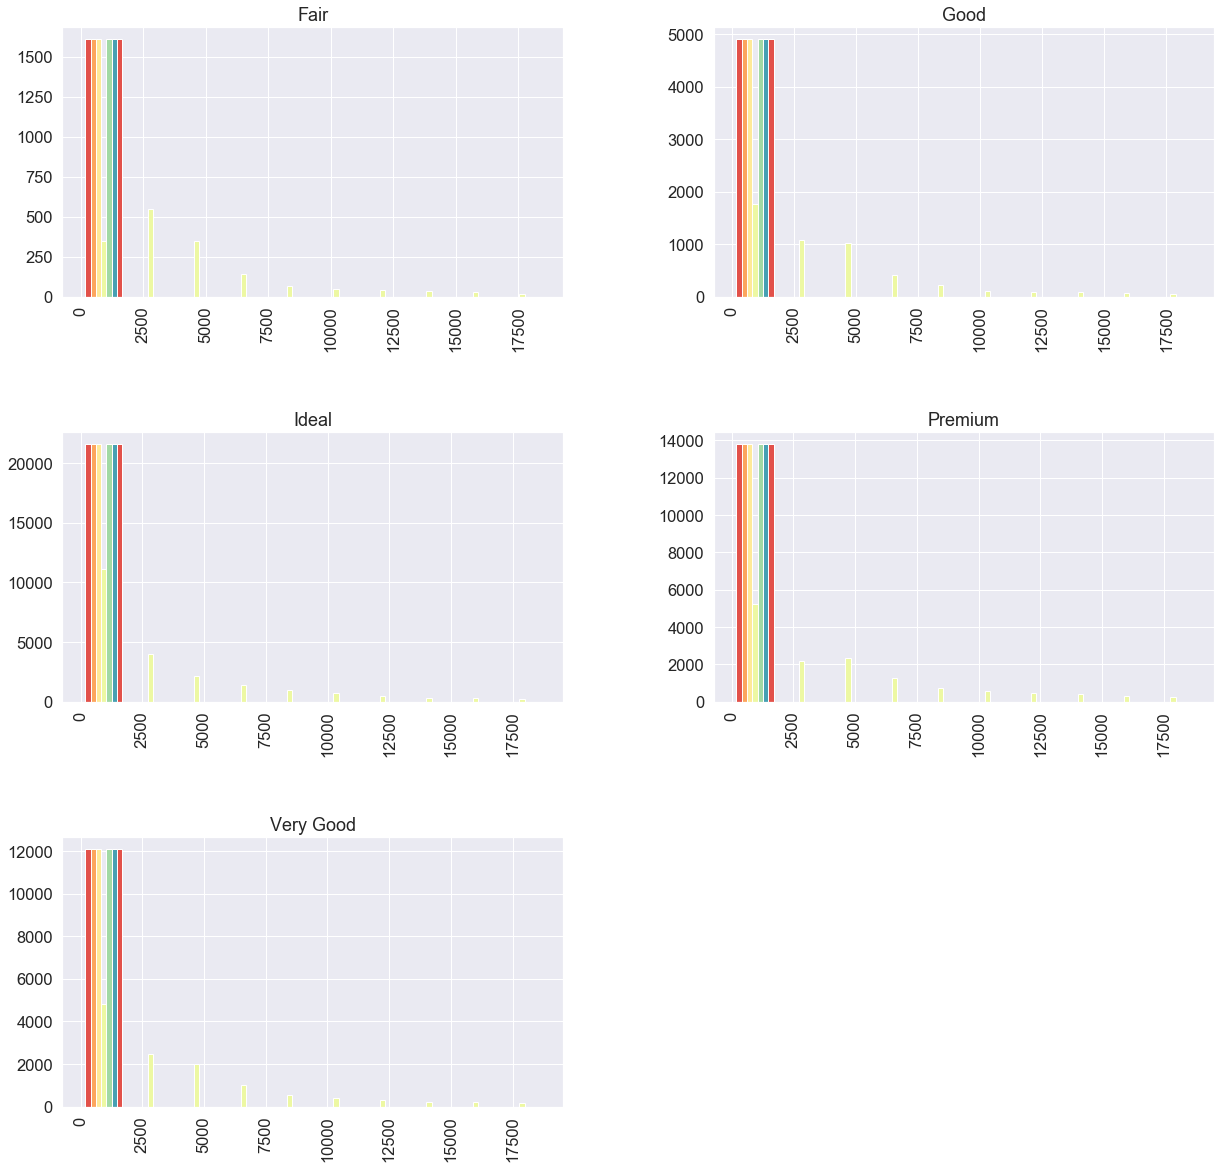

In [18]:
p = diamond_data.hist(figsize = (20,20), by=diamond_data.cut,grid=True)

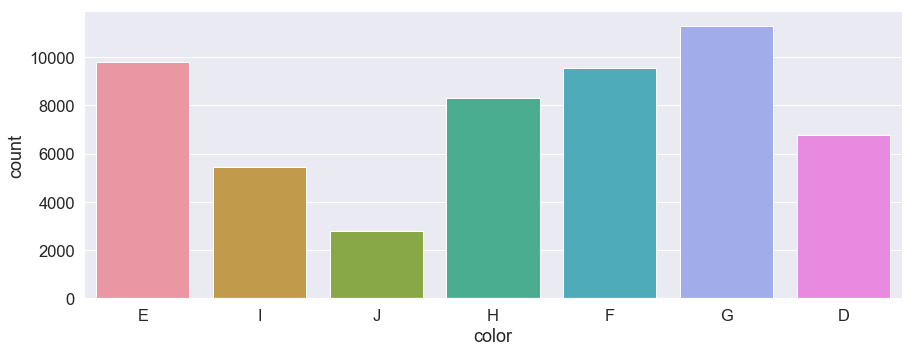

In [19]:
p = sns.factorplot(x='color', data=diamond_data , kind='count',aspect=2.5 )

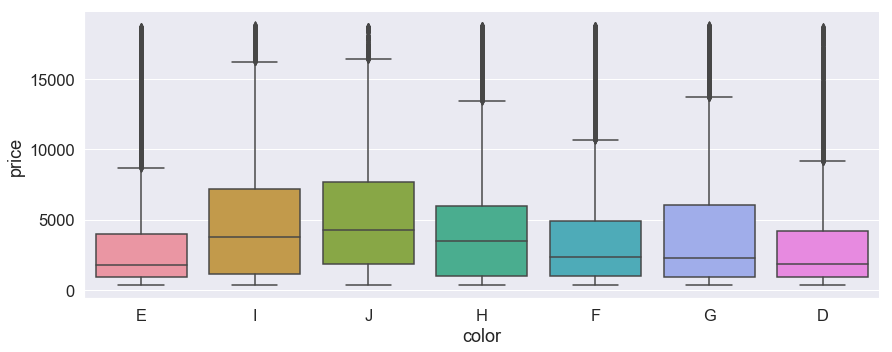

In [20]:
p = sns.factorplot(x='color', y='price', data=diamond_data, kind='box' ,aspect=2.5 )

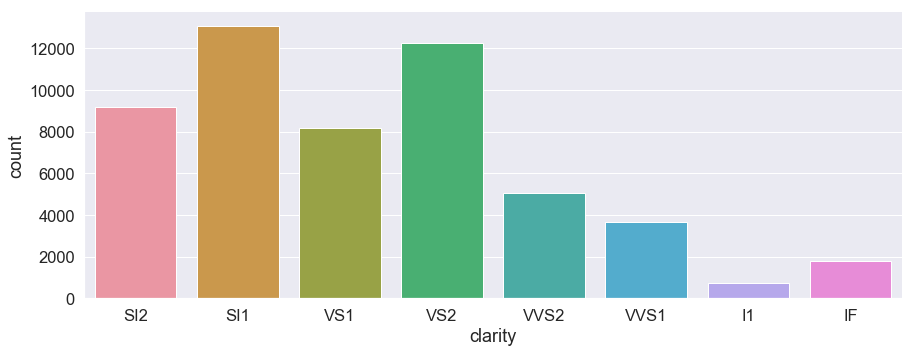

In [21]:
p = sns.factorplot(x='clarity', data=diamond_data , kind='count',aspect=2.5 )

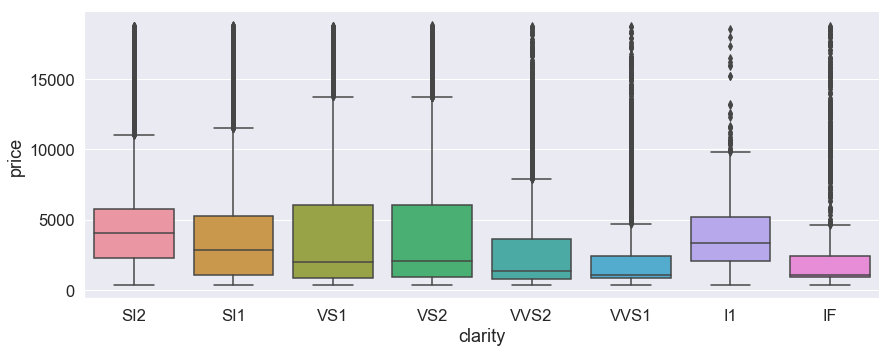

In [22]:
p = sns.factorplot(x='clarity', y='price', data=diamond_data, kind='box' ,aspect=2.5)

# Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive.

# For example in the cut category, be it ideal, fair or any other type, there are diamonds in those categories with high prices.

In [23]:
one_hot_encoders_diamond_data =  pd.get_dummies(diamond_data)
one_hot_encoders_diamond_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [24]:
# a structured approach
cols = one_hot_encoders_diamond_data.columns
diamond_clean_data = pd.DataFrame(one_hot_encoders_diamond_data,columns= cols)
diamond_clean_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [25]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data[['carat','depth','x','y','z','table']]),columns=['carat','depth','x','y','z','table'],index=diamond_clean_data.index)

In [26]:
numericals.head()

,carat,depth,x,y,z,table
0,-1.198204,-0.174203,-1.591573,-1.539219,-1.580084,-1.099725
1,-1.240417,-1.361090,-1.645173,-1.662014,-1.750896,1.585988
2,-1.198204,-3.385781,-1.502241,-1.460280,-1.750896,3.376463
3,-1.071566,0.454149,-1.368242,-1.319943,-1.295396,0.243131
4,-1.029353,1.082501,-1.243176,-1.214690,-1.124583,0.243131


In [27]:
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]

In [28]:
diamond_clean_data_standard.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,0,1,0,...,0,1,0,0,0,1,0,0,0,0


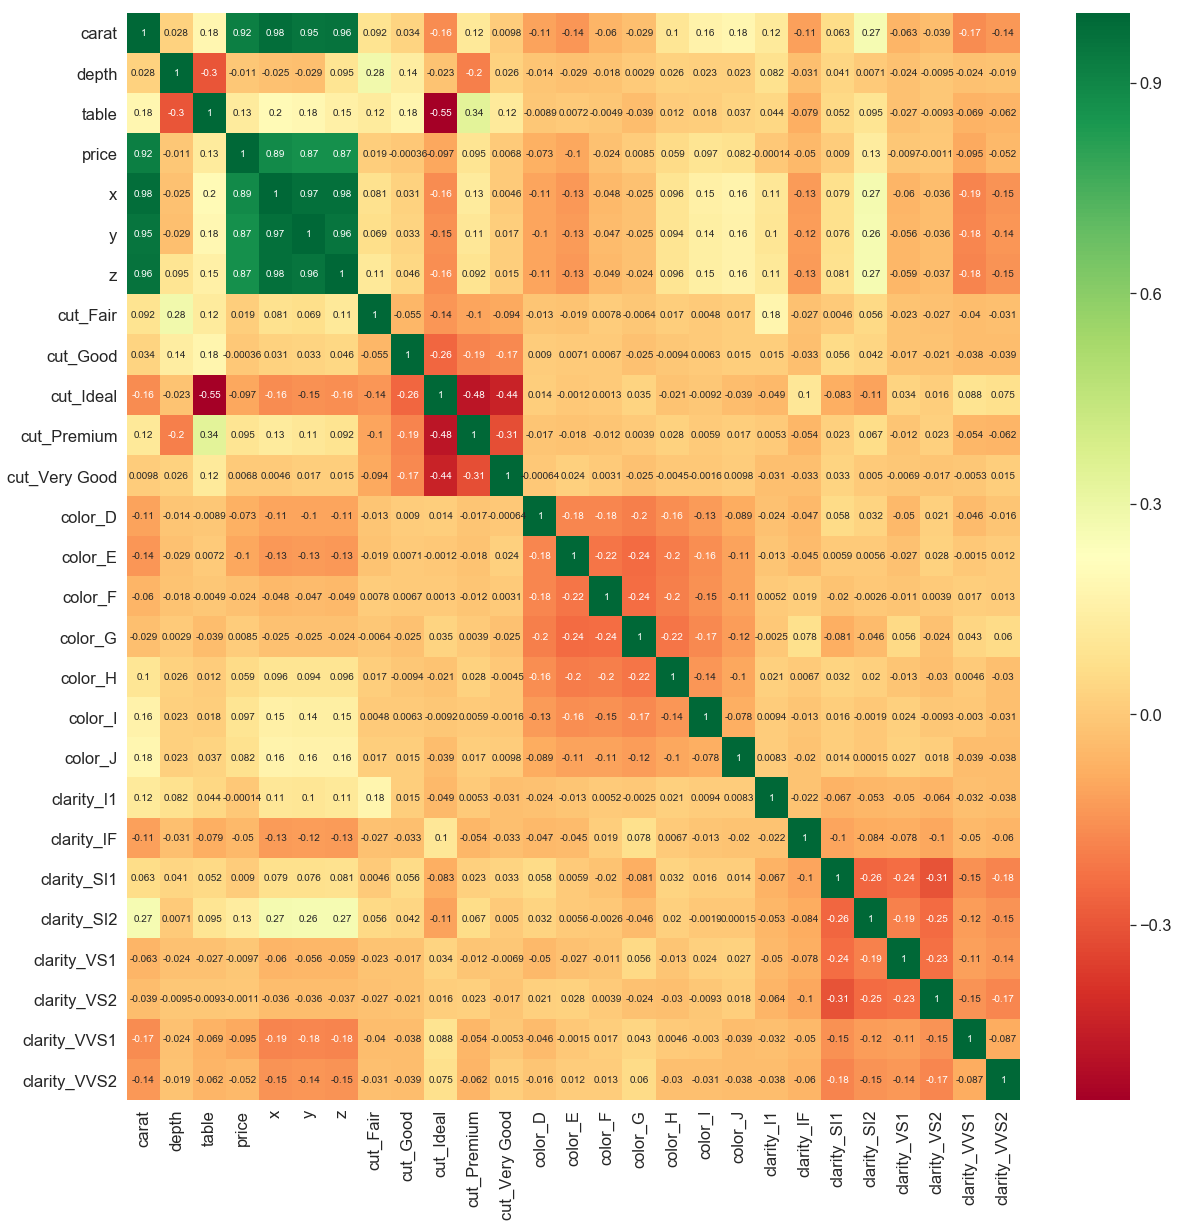

In [29]:
#on this line I just set the size of figure to 12 by 10.
plt.figure(figsize=(20,20)) 

# seaborn has very simple solution for heatmap
p=sns.heatmap(diamond_clean_data.corr(), annot=True,cmap='RdYlGn')  

In [30]:
x = diamond_clean_data_standard.drop(["price"],axis=1)
y = diamond_clean_data_standard.price

In [31]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

In [32]:
#Model Training
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


regr = linear_model.LinearRegression(normalize=True)
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)

In [33]:
y_pred

array([ 122.,  356., 3054., ..., 5096., -792.,  464.])

In [34]:
diamond_clean_data_standard.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,5.392000e+04,5.392000e+04,5.392000e+04,53920.000000,5.392000e+04,5.392000e+04,5.392000e+04,53920.000000,53920.000000,53920.000000,...,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,-2.289977e-14,-2.795830e-15,1.116263e-14,3930.993231,1.150167e-15,-3.277413e-15,2.775953e-15,0.029841,0.090912,0.399629,...,0.100538,0.052077,0.013687,0.033197,0.242266,0.170345,0.151521,0.227263,0.067767,0.093954
std,1.000009e+00,1.000009e+00,1.000009e+00,3987.280446,1.000009e+00,1.000009e+00,1.000009e+00,0.170149,0.287487,0.489827,...,0.300719,0.222185,0.116189,0.179153,0.428459,0.375939,0.358559,0.419068,0.251348,0.291767
min,-1.261523e+00,-1.309033e+01,-6.471152e+00,326.000000,-1.788105e+00,-1.802350e+00,-3.515961e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.393962e-01,-5.232876e-01,-6.521065e-01,949.000000,-9.126456e-01,-8.901618e-01,-8.968327e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.062054e-01,3.524770e-02,-2.044876e-01,2401.000000,-2.825308e-02,-2.182854e-02,-1.430039e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.114107e-01,5.239661e-01,6.907501e-01,5323.250000,7.221406e-01,7.061681e-01,7.116536e-01,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.890635e+00,1.204376e+01,1.680503e+01,18823.000000,4.474109e+00,4.663135e+01,4.022633e+01,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
diamond_clean_data_standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 27 columns):
carat            53920 non-null float64
depth            53920 non-null float64
table            53920 non-null float64
price            53920 non-null int64
x                53920 non-null float64
y                53920 non-null float64
z                53920 non-null float64
cut_Fair         53920 non-null uint8
cut_Good         53920 non-null uint8
cut_Ideal        53920 non-null uint8
cut_Premium      53920 non-null uint8
cut_Very Good    53920 non-null uint8
color_D          53920 non-null uint8
color_E          53920 non-null uint8
color_F          53920 non-null uint8
color_G          53920 non-null uint8
color_H          53920 non-null uint8
color_I          53920 non-null uint8
color_J          53920 non-null uint8
clarity_I1       53920 non-null uint8
clarity_IF       53920 non-null uint8
clarity_SI1      53920 non-null uint8
clarity_SI2      53920 non-null uint8
clari

In [36]:
#Linear Regression
from sklearn.metrics import mean_absolute_error
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
print('Coefficients: \n', regr.coef_)

accuracy: 92.20915263315173%
Mean absolute error: 731.6019411473789
Mean squared error: 1222457.3868076163
Coefficients: 
 [ 5.39683506e+03 -8.26615440e+01 -5.25334937e+01 -1.18716778e+03
  1.06526010e+01 -5.41499264e+01  1.51259408e+16  1.51259408e+16
  1.51259408e+16  1.51259408e+16  1.51259408e+16 -2.85304095e+15
 -2.85304095e+15 -2.85304095e+15 -2.85304095e+15 -2.85304095e+15
 -2.85304095e+15 -2.85304095e+15 -3.13985341e+15 -3.13985341e+15
 -3.13985341e+15 -3.13985341e+15 -3.13985341e+15 -3.13985341e+15
 -3.13985341e+15 -3.13985341e+15]


# Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features.

#Ridge Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients Minimization objective = LS Obj + α * (sum of square of coefficients)

#Lasso Regression:
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients Minimization objective = LS Obj + α * (sum of absolute value of coefficients) Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

In [37]:
#Lasso Regression
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
print('Coefficients: \n', las_reg.coef_)

accuracy: 92.20342856834277%
Mean absolute error: 729.9153209546201
Mean squared error: 1223355.5465300158
Coefficients: 
 [ 5344.26517375   -83.99287698   -56.78682661 -1126.74383772
     0.           -57.31096006  -694.74075596  -131.63941833
   109.68521407    40.64755918     0.           457.70090223
   269.26165203   197.17591326     0.          -486.01120851
  -978.97849465 -1831.13344583 -4364.86316755   959.86871725
  -679.07006653 -1634.17043883   215.47113159   -78.43594446
   600.12387651   578.23105402]


In [38]:
#Ridge Regression
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
print('Coefficients: \n', rig_reg.coef_)

accuracy: 92.21059025809676%
Mean absolute error: 731.4437670796422
Mean squared error: 1222231.809902978
Coefficients: 
 [ 5.39260506e+03 -8.25873269e+01 -5.49223048e+01 -1.17914092e+03
  1.32893507e+01 -5.95423178e+01 -5.81227318e+02 -8.21420721e-01
  2.53703939e+02  1.87925164e+02  1.40419636e+02  8.11708995e+02
  6.19284054e+02  5.46535272e+02  3.40468598e+02 -1.52343097e+02
 -6.51807006e+02 -1.51384682e+03 -3.88007182e+03  1.54369668e+03
 -1.29607304e+02 -1.09058188e+03  7.77149817e+02  4.69832284e+02
  1.16826409e+03  1.14131813e+03]


In [ ]:
#Stats Model Interpretation and Backward Elimination Technique

In [39]:
l = list(range(0,len(diamond_clean_data_standard.columns)))

In [40]:
import statsmodels.formula.api as smf
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.price, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.699e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:35:09   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53896   BIC:                         9.111e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2294.9376      6.679    343.627      0.000    2281.848    2308.028
x1          5460.7579     24.462    223.235      0.000    5412.812    5508.703
x2           -93.2107      6.644    -14.029      0.000    -106.233     -80.188
x3           -59.0772      6.491     -9.102      0.000     -71.799     -46.355
x4         -1232.1165     39.171    -31.455      0.000   -1308.893   -1155.341
x5            29.5666     22.172      1.334      0.182     -13.890      73.023
x6           -80.7768     26.583     -3.039      0.002    -132.880     -28.673
x7          -114.9354     25.534     -4.501      0.000    -164.981     -64.889
x8           459.4552     14.752     31.146      0.000     430.542     488.368
x9           709.9431     11.321     62.712      0.000     687.754     732.132
x10          638.0686     10.684     59.724      0.000     617.129     659.009
x11          602.4060     10.676     56.426      0.000     581.481     623.331
x12         1153.4995     13.106     88.015      0.000    1127.812    1179.187
x13          944.5963     11.215     84.227      0.000     922.615     966.578
x14          886.0969     11.150     79.470      0.000     864.243     907.951
x15          676.3244     10.474     64.571      0.000     655.795     696.854
x16          173.7411     11.764     14.769      0.000     150.684     196.798
x17         -316.7539     14.261    -22.211      0.000    -344.706    -288.802
x18        -1222.5666     19.366    -63.130      0.000   -1260.524   -1184.610
x19        -3532.3768     38.060    -92.810      0.000   -3606.975   -3457.778
x20         1807.9003     24.938     72.497      0.000    1759.022    1856.778
x21          145.3856     11.310     12.855      0.000     123.218     167.553
x22         -815.6870     13.012    -62.686      0.000    -841.191    -790.183
x23         1054.6669     13.015     81.034      0.000    1029.157    1080.177
x24          743.9698     11.371     65.425      0.000     721.682     766.258
x25         1471.6332     18.243     80.669      0.000    1435.877    1507.389
x26         1419.4455     15.760     90.064      0.000    1388.555    1450.336
==============================================================================
Omnibus:                    14447.606   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637923.673
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.816   Cond. No.                     1.17e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix 

In [41]:
l.pop(5)
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.price, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.821e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:35:25   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53897   BIC:                         9.111e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2294.8033      6.678    343.643      0.000    2281.715    2307.892
x1          5461.3578     24.458    223.296      0.000    5413.420    5509.296
x2           -94.0748      6.613    -14.227      0.000    -107.036     -81.114
x3           -59.2309      6.490     -9.127      0.000     -71.951     -46.510
x4         -1208.9309     35.101    -34.441      0.000   -1277.730   -1140.132
x5           -75.5041     26.288     -2.872      0.004    -127.029     -23.980
x6          -115.9251     25.523     -4.542      0.000    -165.950     -65.900
x7           459.9913     14.746     31.194      0.000     431.089     488.894
x8           710.1280     11.320     62.733      0.000     687.941     732.315
x9           637.4627     10.674     59.721      0.000     616.542     658.384
x10          603.1463     10.662     56.572      0.000     582.250     624.043
x11         1153.4708     13.106     88.013      0.000    1127.783    1179.158
x12          944.6103     11.215     84.227      0.000     922.629     966.592
x13          886.0855     11.150     79.468      0.000     864.231     907.940
x14          676.2857     10.474     64.567      0.000     655.756     696.815
x15          173.7618     11.764     14.771      0.000     150.704     196.819
x16         -316.8024     14.261    -22.215      0.000    -344.754    -288.851
x17        -1222.6084     19.366    -63.132      0.000   -1260.566   -1184.651
x18        -3533.1209     38.056    -92.839      0.000   -3607.712   -3458.530
x19         1808.1168     24.937     72.507      0.000    1759.240    1856.994
x20          145.4078     11.310     12.857      0.000     123.240     167.575
x21         -815.6680     13.012    -62.685      0.000    -841.172    -790.164
x22         1054.8099     13.015     81.047      0.000    1029.301    1080.319
x23          743.9744     11.371     65.425      0.000     721.686     766.262
x24         1471.7206     18.243     80.674      0.000    1435.965    1507.477
x25         1419.5626     15.760     90.072      0.000    1388.672    1450.453
==============================================================================
Omnibus:                    14444.305   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638508.611
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.824   Cond. No.                     2.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.97e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""